In [66]:
import pandas as pd
import numpy as np
from numpy.lib.function_base import average
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Evaluation & CV Libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score, KFold

In [2]:
df=pd.read_csv('kc_house_data-Copy1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
# A data set contains 21613 obervations with 19 features plus house price. The names of the columns are given below.

# id - Unique ID for each home sold
# date - Date of the home sale
# price - Price of each home sold
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the apartments interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
# condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Lattitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# The main goal is to predict price of each house

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Deleting column 0 - id
df.drop(['id'], axis=1, inplace=True)

# 1 Data description

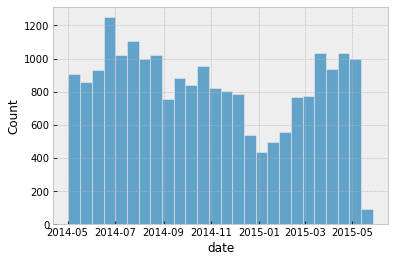

In [6]:
# 1 dates between 2014-05-02 and 2015-05-27
plt.style.use('bmh')
df['date']=pd.to_datetime(df['date'])
sns.histplot(x='date', data=df)
plt.show()

In [24]:
df.drop('date', axis=1, inplace=True)

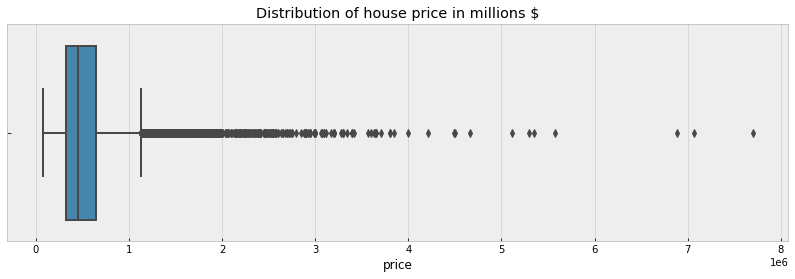

In [7]:
#2 price   -    our target value
plt.figure(figsize=(14,4))
sns.boxplot(x='price', data=df).set(title='Distribution of house price in millions $')
plt.show()

In [8]:
#3-4 bedrooms, bathrooms - checking records with zeros
df[(df['bedrooms']==0) & (df['bathrooms']==0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6994,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
14423,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


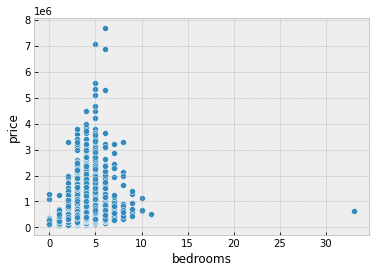

In [9]:
# bedrooms - Number of bedrooms
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.show()

#### we have one outlier with 33 bedrooms. 

In [17]:
# I'm changing '0' and '33' bedrooms to Nan:
df["bedrooms"] = np.where((df["bedrooms"] == 0) | (df["bedrooms"] == 33), np.NaN, df["bedrooms"])

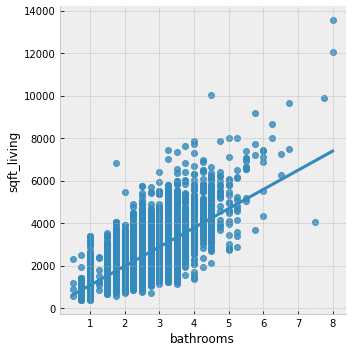

In [18]:
#4 bathrooms
sns.lmplot(x='bathrooms', y='sqft_living', data=df)
plt.show()

In [19]:
# I'm changing '0' of bathrooms to Nan:
df["bathrooms"] = np.where((df["bathrooms"] == 0), np.NaN, df["bathrooms"])

In [25]:
# Changing Nan values with Iterative Imputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

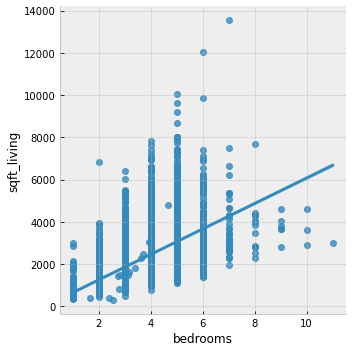

In [28]:
sns.lmplot(x='bedrooms', y='sqft_living', data=df)
plt.show()

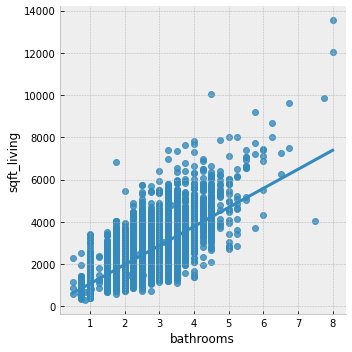

In [30]:
sns.lmplot(x='bathrooms', y='sqft_living', data=df)
plt.show()

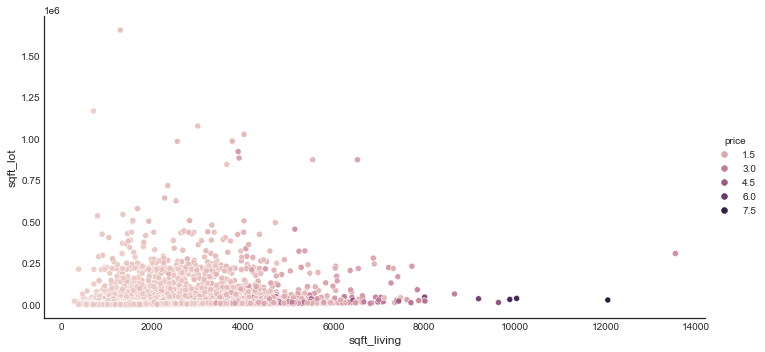

In [31]:
#5 sqft_living - Square footage of the apartments interior living space
#6 sqft_lot - Square footage of the land space
plt.style.use('seaborn-white')
sns.relplot(y='sqft_lot', x='sqft_living', data=df, kind='scatter', hue='price', aspect=2)
plt.show()

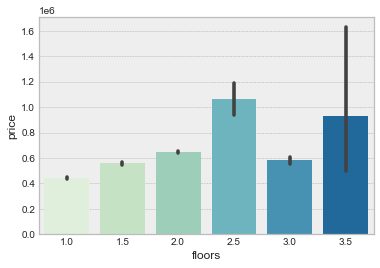

In [32]:
#7 floors - Number of floors
plt.style.use('bmh')
sns.barplot(x='floors', y='price', data=df, palette=sns.color_palette('GnBu', 6))
plt.show()

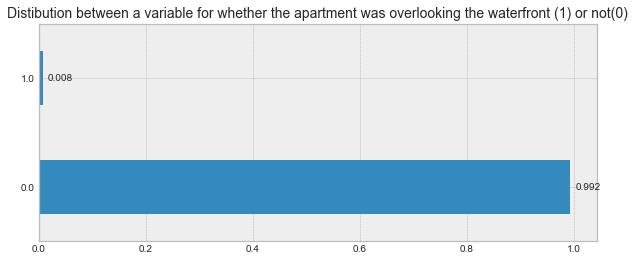

In [33]:
#8 waterfront: A variable for whether the apartment was overlooking the waterfront or not

# Create the bar chart with value counts
plt.figure(figsize=(10,4))
ax = df['waterfront'].value_counts(normalize=True).plot(kind='barh')
plt.title('Distibution between a variable for whether the apartment was overlooking the waterfront (1) or not(0)',
          fontsize=14)

# Add the values to the chart
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height()/2, str(round(i.get_width(), 3)), va='center')

plt.show()

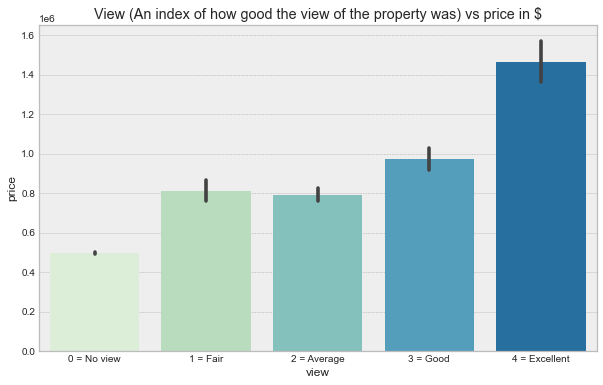

In [34]:
#9 view: An index from 0 to 4 of how good the view of the property was:
# 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
plt.figure(figsize=(10,6))
g = sns.barplot(x='view', y='price', data=df, palette=sns.color_palette('GnBu', 5))
plt.title('View (An index of how good the view of the property was) vs price in $')
g.set(xticklabels=('0 = No view', '1 = Fair', '2 = Average', '3 = Good', '4 = Excellent'))
plt.show()

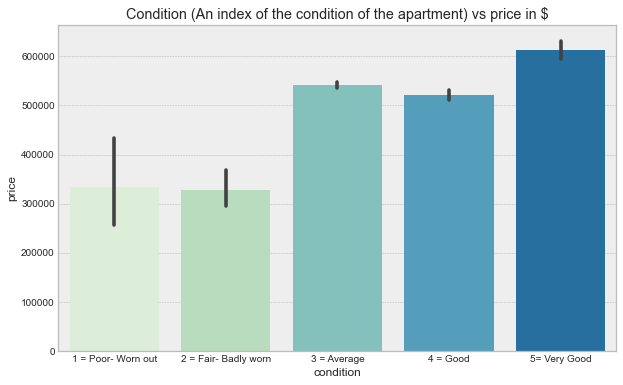

In [35]:
#10 condition - An index from 1 to 5 on the condition of the apartment:
plt.figure(figsize=(10,6))
g = sns.barplot(x='condition', y='price', data=df, palette=sns.color_palette('GnBu', 5))
plt.title('Condition (An index of the condition of the apartment) vs price in $')
g.set(xticklabels=('1 = Poor- Worn out', '2 = Fair- Badly worn', '3 = Average', '4 = Good', '5= Very Good'))
plt.show()

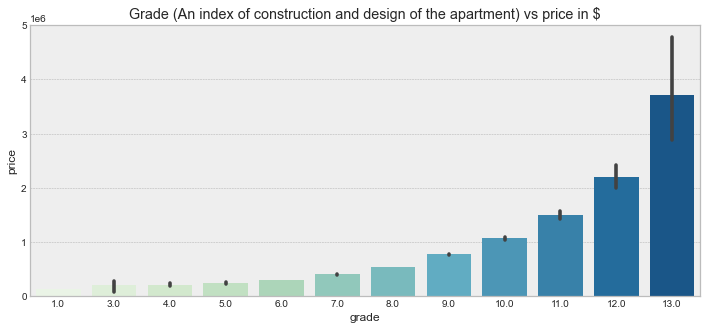

In [36]:
#11 grade - An index from 1 to 13, where:
    # 1-3 falls short of building construction and design, 
    # 7 has an average level of construction and design,
    # 11-13 have a high quality level of construction and design.
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='price', data=df, palette=sns.color_palette('GnBu', 12))
plt.title('Grade (An index of construction and design of the apartment) vs price in $')
plt.show()

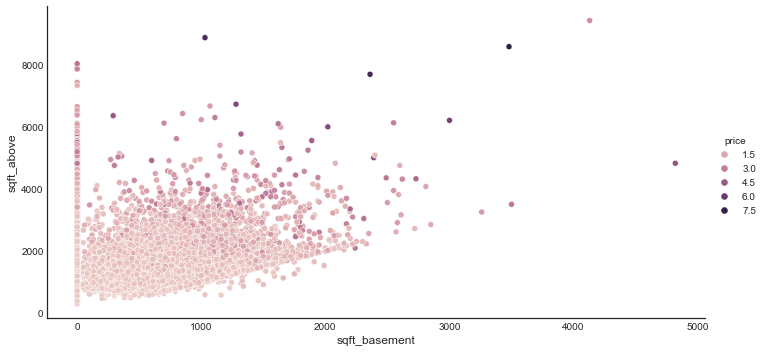

In [37]:
#12 sqft_above: the square footage of the interior housing space that is above ground level
#13 sqft_basement: The square footage of the interior housing space that is below ground level
plt.style.use('seaborn-white')
sns.relplot(y='sqft_above', x='sqft_basement', data=df, kind='scatter', hue='price', aspect=2)
plt.show()

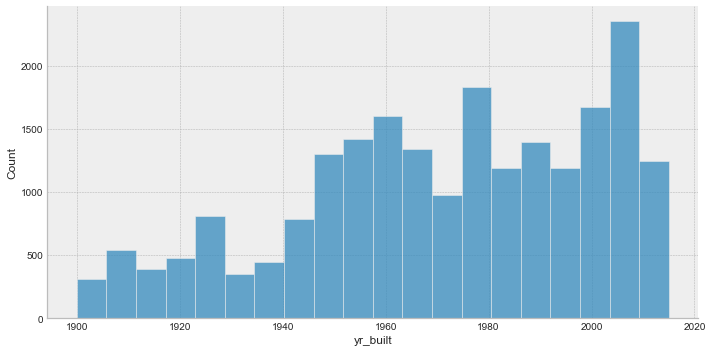

In [38]:
#14 yr_built: The year the house was initially built
plt.style.use('bmh')
sns.displot(df.yr_built, bins=20, aspect=2)
plt.show()

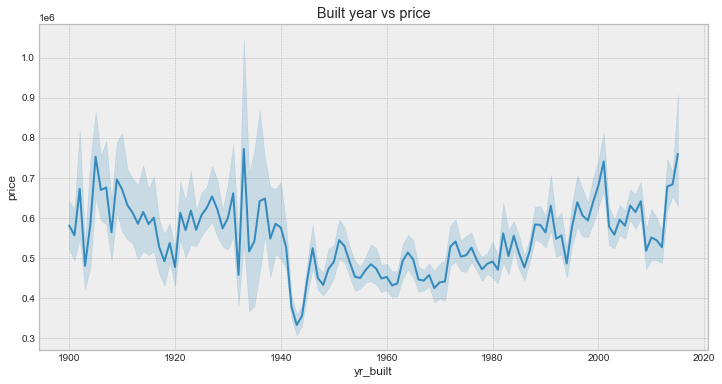

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(x='yr_built', y='price', data=df).set(title='Built year vs price')
plt.show()

In [40]:
#15 yr_renovated
df['yr_renovated'].value_counts()

0.0       20699
2014.0       91
2013.0       37
2003.0       36
2005.0       35
          ...  
1951.0        1
1959.0        1
1948.0        1
1954.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

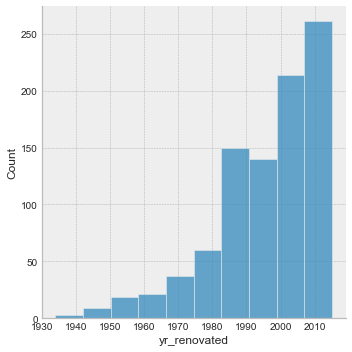

In [41]:
df_ren = df[(df['yr_renovated'] > 0)]
sns.displot(df_ren.yr_renovated, bins=10)
plt.show()

#### only 914 buildings were renovated (it's ~4,2% of all records)

In [42]:
# chcecking prices of renovated houses

df_ren['yr_ren_cat']=pd.cut(df_ren['yr_renovated'], bins=[0,1950,1975,2000,2025],
                       labels=['before 1950','between 1950-1975','between 1975-2000','after 2000'])
df_ren['yr_ren_cat'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_7612\3662130809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ren['yr_ren_cat']=pd.cut(df_ren['yr_renovated'], bins=[0,1950,1975,2000,2025],


after 2000           423
between 1975-2000    396
between 1950-1975     83
before 1950           12
Name: yr_ren_cat, dtype: int64

In [43]:
df_ren.groupby('yr_ren_cat').agg(
    {
        'price':[min, average, max],
    })

price                          
                        min        average        max
yr_ren_cat                                           
before 1950        152275.0  385743.750000   565000.0
between 1950-1975  160000.0  503443.795181  2050000.0
between 1975-2000  135000.0  763934.361111  7700000.0
after 2000         110000.0  818093.773050  7062500.0

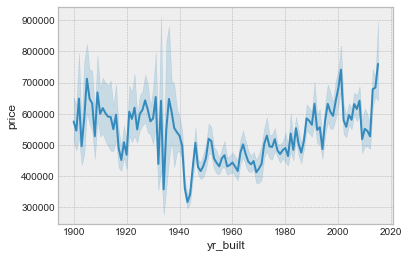

In [44]:
# chcecking prices of not renovated houses

df_not_ren = df[(df['yr_renovated'] == 0)]
sns.lineplot(x='yr_built', y='price', data=df_not_ren)
plt.show()

In [45]:
df_not_ren['not_ren_built_yr']=pd.cut(df['yr_built'], bins=[0,1950,1975,2000,2025],
                       labels=['before 1950','between 1950-1975','between 1975-2000','after 2000'])
df_not_ren['not_ren_built_yr'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_7612\3944875834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_ren['not_ren_built_yr']=pd.cut(df['yr_built'], bins=[0,1950,1975,2000,2025],


between 1975-2000    6084
between 1950-1975    5497
before 1950          4578
after 2000           4540
Name: not_ren_built_yr, dtype: int64

In [46]:
df_not_ren.groupby('not_ren_built_yr').agg(
    {
        'price':[min, average, max],
    })

price                          
                        min        average        max
not_ren_built_yr                                     
before 1950         78000.0  520122.902359  3650000.0
between 1950-1975   75000.0  456459.765508  3395000.0
between 1975-2000  100000.0  541475.436555  5300000.0
after 2000         155000.0  615268.731498  6885000.0

#### house prices that were renovated before 1950 are lower than not renovated. I'm changing this 12 records to 0 (not renovated). For other renovated I'm changong numbers to 1 - then it will be a column renovated (1) or not (0)

In [47]:
# buildings renovated before 1950 has less price than not renovated, I'm changing it into 0 (yr_renovated < 1950):
df["yr_renovated"] = np.where((df["yr_renovated"] <= 1950), 0, df["yr_renovated"])
df["yr_renovated"] = np.where((df["yr_renovated"] > 1950), 1, df["yr_renovated"])
df['yr_renovated'].value_counts()

0.0    20711
1.0      902
Name: yr_renovated, dtype: int64

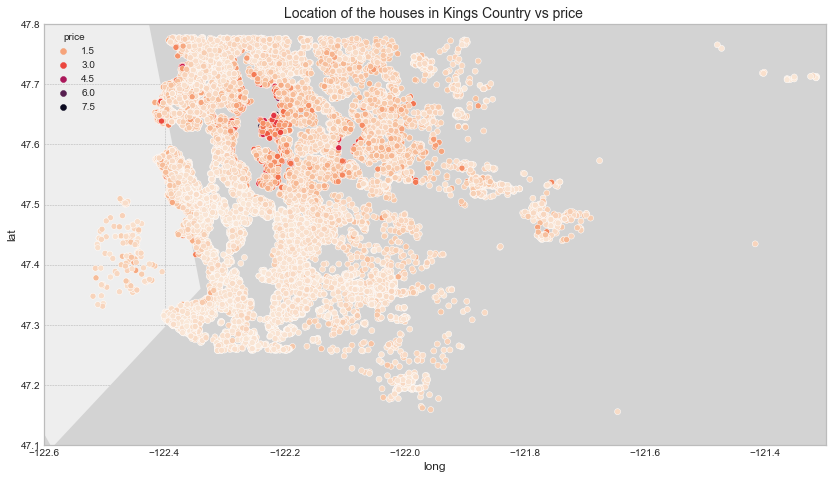

In [48]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(14, 9))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Mean_delay data with a color map
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='rocket_r')
plt.title('Location of the houses in Kings Country vs price ', fontsize=14)
plt.xlim([-122.6, -121.3])
plt.ylim([47.1, 47.8])
plt.show()

#### Now it's better. We can see where the most expensive houses are located in Medina

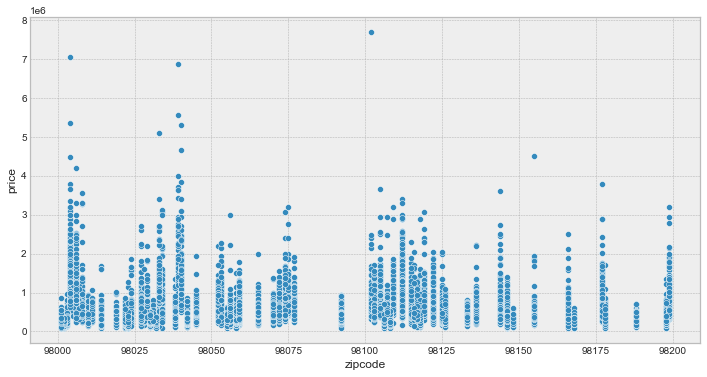

In [49]:
# 16 zipcode
plt.figure(figsize=(12,6))
sns.scatterplot(x='zipcode', y='price', data=df)
plt.show()

In [50]:
Unique_zipcode=len(df['zipcode'].unique())
print('Number of unique zipcodes: ' + str(Unique_zipcode))

Number of unique zipcodes: 70


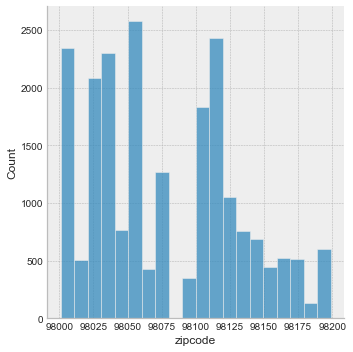

In [52]:
# zipcode distribution
sns.displot(df.zipcode, bins=20)
plt.show()

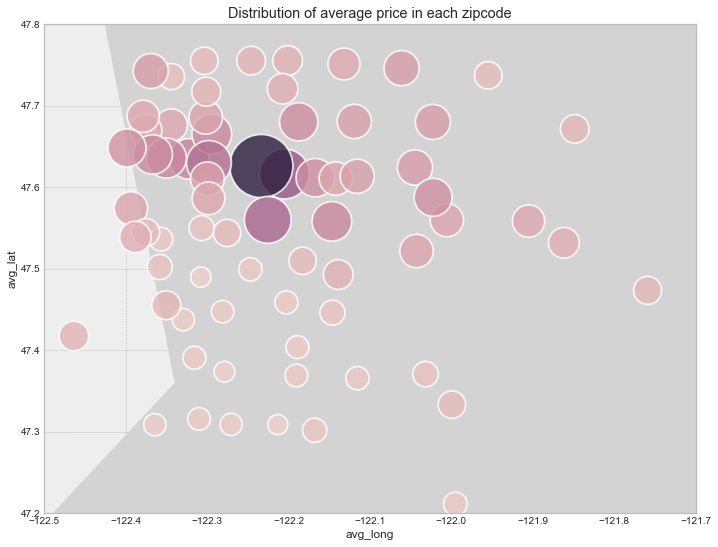

In [53]:
zipprice = pd.DataFrame(df[['price', 'lat', 'long']].groupby(df['zipcode']).mean())
zipprice.rename(columns = {'price':'zip_price', 'lat':'avg_lat', 'long':'avg_long'}, inplace = True)

# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(16, 9))
worldmap.plot(color="lightgrey", ax=ax)

sns.scatterplot(x='avg_long', y='avg_lat', data=zipprice, size='zip_price', hue='zip_price', 
                sizes=(400, 4000), alpha=0.8, legend=False).set(title='Distribution of average price in each zipcode')
plt.xlim([-122.5, -121.7])
plt.ylim([47.2, 47.8])
plt.show()

plt.show()

#### The highest price are shown as big black bubble (location - Medina). The farther from this point the prices decrease.

In [54]:
# Add zip_price column to the dataframe
df['zip_price'] = df.groupby(['zipcode']).price.transform('mean')

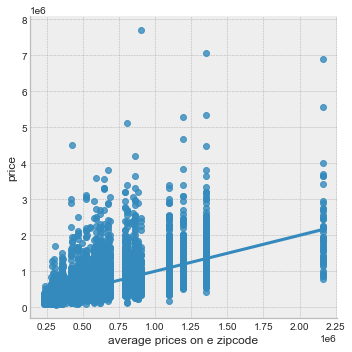

In [55]:
sns.lmplot(x='zip_price', y='price', data=df).set(xlabel="average prices on e zipcode")
plt.show()

#### Average prices in zipcode 98039 are even few times bigger than on other zipcodes.

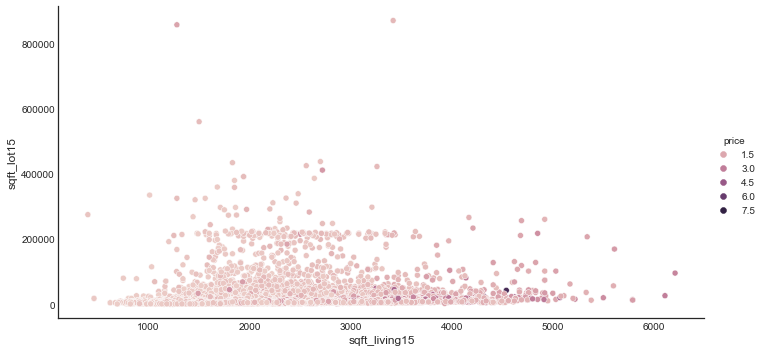

In [56]:
#18 sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#19 sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
plt.style.use('seaborn-white')
sns.relplot(y='sqft_lot15', x='sqft_living15', data=df, kind='scatter', hue='price', aspect=2)
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  float64
 7   view           21613 non-null  float64
 8   condition      21613 non-null  float64
 9   grade          21613 non-null  float64
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  float64
 12  yr_built       21613 non-null  float64
 13  yr_renovated   21613 non-null  float64
 14  zipcode        21613 non-null  float64
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  float64
 18  sqft_l

In [59]:
df.drop(['zipcode', 'lat', 'long'], axis=1, inplace=True)

<AxesSubplot:>

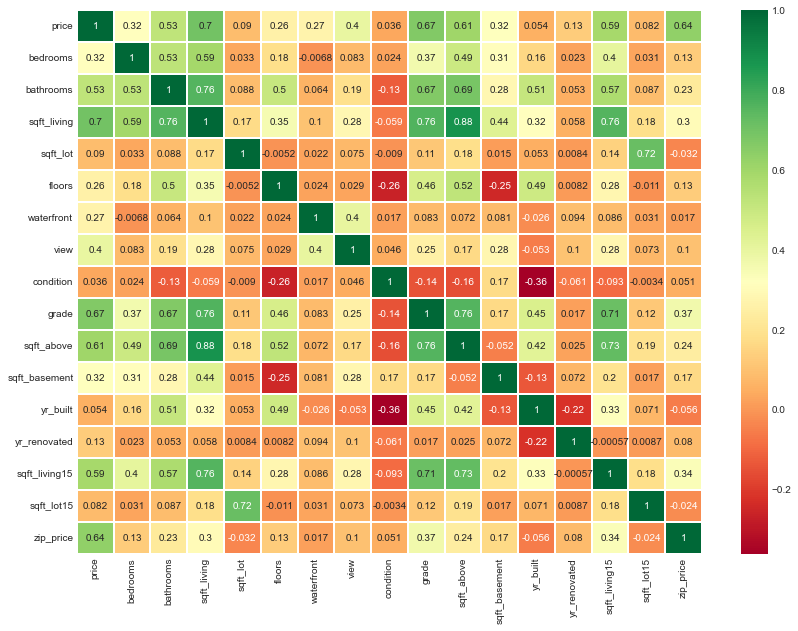

In [61]:
# Checking the correlation
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)

In [63]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zip_price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,5.400881e+05,3.371339,2.115590,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,0.041734,1986.552492,12768.455652,5.400881e+05
std,3.671272e+05,0.904393,0.769128,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.199986,685.391304,27304.179631,2.343263e+05
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,2.342840e+05
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.594832e+05
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.935525e+05
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,6.452315e+05
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,6210.000000,871200.000000,2.160607e+06


# 2 Standardization

In [64]:
# Defining target (y) and variables (X) 
X = df.drop(columns=['price'])
y = df['price']

# Create train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#  Models

In [ ]:
models =[('RF',RandomForestRegressor(random_state=42)), ("CTB", CatBoostRegressor(random_state=42)),
         ("LGBM",LGBMRegressor(random_state=42)), ('GBR',GradientBoostingRegressor(random_state=42)),
         ('XGB', XGBRegressor(random_state=42))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = r2_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [70]:
finalResults

[('CTB', 0.8684454592102635),
 ('LGBM', 0.8654878397626197),
 ('XGB', 0.8624311714147646),
 ('RF', 0.8470118405845222),
 ('GBR', 0.8454319354205652)]

## Cross validation

In [88]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
models = {'RF':RandomForestRegressor(), "CTB":CatBoostRegressor(), "LGBM":LGBMRegressor(), 
          'GBR':GradientBoostingRegressor(), 'XGB': XGBRegressor()}

results_cv = []
for model in models.values():
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kf, scoring="r2")
    results_cv.append(cv_results)

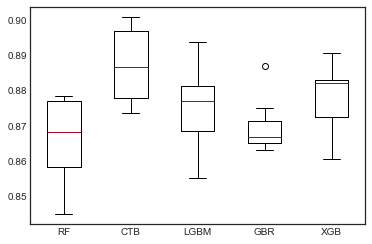

In [95]:
plt.boxplot(results_cv, labels=models.keys())
plt.show()

## Grid Search CV

## CatBoost Regressor hyperparameters tuning

In [73]:
ctb = CatBoostRegressor()
param_ctb = {'n_estimators':[100,200,300], 'depth':list(range(4,8)), 'random_state': [42]}

In [ ]:
grid_ctb = GridSearchCV(ctb, param_ctb, cv=10)
grid_ctb.fit(X_train, y_train)

In [77]:
ctb_cv_resultt = grid_ctb.best_estimator_.predict(X_train)
ctb_cv_result = grid_ctb.best_estimator_.predict(X_test)

print("R2 score for train set: {:.3f}".format(r2_score(y_train, ctb_cv_resultt)))
print("R2 score for test set: {:.3f}".format(r2_score(y_test, ctb_cv_result)))
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, ctb_cv_result)))

R2 score for train set: 0.941
R2 score for test set: 0.868
Mean absolute error for test set: 75442.494


## XGBoosting Regressor hyperparameters tuning

In [78]:
xgb = XGBRegressor()
param_xgb = {'n_estimators':[100,200,300], 'max_depth':list(range(2,8)), 'random_state': [42]}
grid_xgb = GridSearchCV(xgb, param_xgb, cv=10)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [80]:
xgb_cv_resultt = grid_xgb.best_estimator_.predict(X_train)
xgb_cv_result = grid_xgb.best_estimator_.predict(X_test)

print("R2 score for train set: {:.3f}".format(r2_score(y_train, xgb_cv_resultt)))
print("R2 score for test set: {:.3f}".format(r2_score(y_test, xgb_cv_result)))
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, xgb_cv_result)))

R2 score for train set: 0.972
R2 score for test set: 0.862
Mean absolute error for test set: 76185.693


## LGMBRegressor hyperparameters tuning

In [81]:
lgmb = LGBMRegressor()
param_lgmb = {'n_estimators':[100,200,300], 'max_depth':list(range(6,11)), 'random_state': [42]}
grid_lgmb = GridSearchCV(lgmb, param_lgmb, cv=10)
grid_lgmb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [82]:
lgmb_cv_resultt = grid_lgmb.best_estimator_.predict(X_train)
lgmb_cv_result = grid_lgmb.best_estimator_.predict(X_test)

print("R2 score for train set: {:.3f}".format(r2_score(y_train, lgmb_cv_resultt)))
print("R2 score for test set: {:.3f}".format(r2_score(y_test, lgmb_cv_result)))
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, lgmb_cv_result)))

R2 score for train set: 0.953
R2 score for test set: 0.848
Mean absolute error for test set: 76512.137


## Gradient Boosting Regressor hyperparameters tuning

In [83]:
gbr = GradientBoostingRegressor()
param_gbr = {'n_estimators':[100,200,300], 'max_depth':list(range(6,11)), 'random_state': [42]}
grid_gbr = GridSearchCV(lgmb, param_gbr, cv=10)
grid_gbr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [84]:
gbr_cv_resultt = grid_gbr.best_estimator_.predict(X_train)
gbr_cv_result = grid_gbr.best_estimator_.predict(X_test)

print("R2 score for train set: {:.3f}".format(r2_score(y_train, gbr_cv_resultt)))
print("R2 score for test set: {:.3f}".format(r2_score(y_test, gbr_cv_result)))
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, gbr_cv_result)))

R2 score for train set: 0.953
R2 score for test set: 0.848
Mean absolute error for test set: 76512.137


## Random Forest Regressor hyperparameters tuning

In [86]:
rf = RandomForestRegressor()
param_rf = {'n_estimators':[100,200,300], 'max_depth':list(range(5,8)), 'random_state': [42]}
grid_rf = GridSearchCV(rf, param_rf, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]})

In [87]:
rf_cv_resultt = grid_rf.best_estimator_.predict(X_train)
rf_cv_result = grid_rf.best_estimator_.predict(X_test)

print("R2 score for train set: {:.3f}".format(r2_score(y_train, rf_cv_resultt)))
print("R2 score for test set: {:.3f}".format(r2_score(y_test, rf_cv_result)))
print("Mean absolute error for test set: {:.3f}".format(mean_absolute_error(y_test, rf_cv_result)))

R2 score for train set: 0.887
R2 score for test set: 0.827
Mean absolute error for test set: 90625.048


# Conclusions

   ## After going through a bunch of processes, I've successfully built and evaluated five different types of linear regression models in python.
   ## Each model I've checked with the same parameters, like: n_estimator (the number of boosting stages to perform) or max_depth (the depth of the tree node).
   ## Too high values of these parameters lead to overfitting the models.
   ## Best r2_scores are about 95-96% for training dataset and about 85-87% for test set (mean_absolute_error ~76000$)
## Crossvalidation of whole dataset gives mean r2_scores about 89% for CatBoost